# Week 2 - Homework
**Homework**

The homework for this week is to build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

**Step 1 -** Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

**Step 2 -** Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

**Step 3 -** Visualize your result using matplotlib or another plotting library of your choice

Once your code is complete, upload it to GitHub and send the github link to gradedhomeworkassignments@gmail.com with your full name as the subject line.  Good luck!

BLOG REFERENCE CODE: https://github.com/VincentTatan/PythonAnalytics

In [107]:
!ls .

sample_data


Read apple dataset from yahoo via `pandas_datareader`

In [108]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275


In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

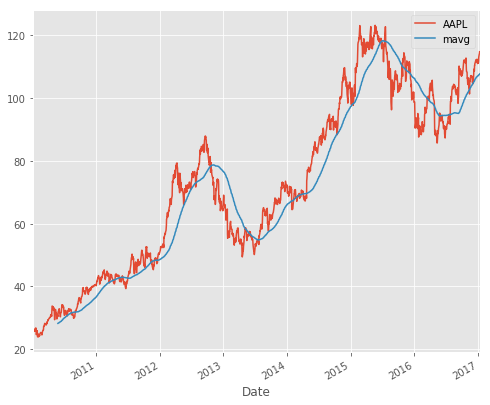

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

## Engineer some stock features


In [0]:
dfreg = df.loc[:,['Adj Close', 'Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

1. Drop missing value
2. Separating the label here, we want to predict the AdjClose
3. Scale the X so that everyone can have the same distribution for linear regression
4. Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
5. Separate label and identify it as y
6. Separation of training and testing of model by cross validation train test split





In [0]:
import math
import numpy as np
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

Make X and Y batchs

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Time to start predicting

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [115]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

Adding KNN

In [116]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Evaluate Predictions

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

Predict lately with linear regression



In [118]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(dfreg)

             Adj Close       Volume    HL_PCT  PCT_change       label  Forecast
Date                                                                           
2010-01-04   26.681330  123432400.0  0.990606    0.271752   23.944765       NaN
2010-01-05   26.727465  150476200.0  1.091520   -0.102519   24.277634       NaN
2010-01-06   26.302330  138040000.0  2.123523   -1.590633   24.418516       NaN
2010-01-07   26.253704  119282800.0  1.400893   -0.552538   24.838663       NaN
2010-01-08   26.428249  111902700.0  1.386924    0.798864   23.943514       NaN
2010-01-11   26.195114  115557400.0  2.165531   -1.264095   24.368649       NaN
2010-01-12   25.897146  148614900.0  1.612746   -0.702707   24.201584       NaN
2010-01-13   26.262434  151473000.0  3.242343    1.337373   24.459652       NaN
2010-01-14   26.110340  108223500.0  0.687577   -0.323641   24.326265       NaN
2010-01-15   25.673977  148516900.0  2.782498   -2.370452   24.768839       NaN
2010-01-19   26.809748  182501900.0  3.6

### Setup the other predictors

In [0]:
forecast_set_poly2 = clfpoly2.predict(X_lately)
forecast_set_poly3 = clfpoly3.predict(X_lately)
forecast_set_knn = clfknn.predict(X_lately)


# Linear Regression Graph


In [0]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

next_date_original = next_date

# for i in forecast_set:
#     next_date = next_unix
#     next_unix += datetime.timedelta(days=1)
#     dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
# dfreg['Adj Close'].tail(500).plot()
# dfreg['Forecast'].tail(500).plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

# Quadratic Regression Graph


In [0]:

# next_date = next_date_original

# for i in forecast_set_poly2:
#     next_date = next_unix
#     next_unix += datetime.timedelta(days=1)
#     dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
# dfreg['Adj Close'].tail(500).plot()
# dfreg['Forecast'].tail(500).plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

In [0]:
next_date = next_date_original

# for i in forecast_set_poly3:
#     next_date = next_unix
#     next_unix += datetime.timedelta(days=1)
#     dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
# dfreg['Adj Close'].tail(500).plot()
# dfreg['Forecast'].tail(500).plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

# KNN Graph

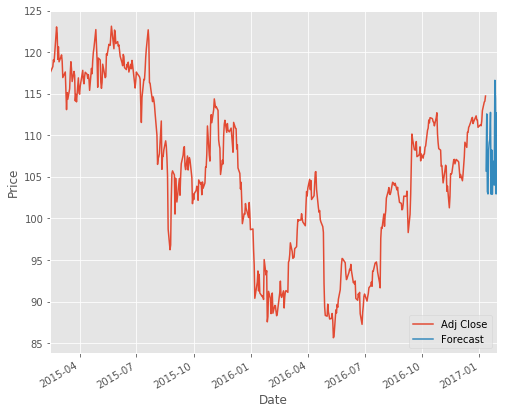

In [123]:
next_date = next_date_original

for i in forecast_set_knn:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()